# Deal with data

In [68]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [69]:
plt.style.use('fast')
!pip install missingno
import missingno as msngno 
%matplotlib inline
import ast
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [70]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.shape, test.shape

((3000, 23), (4398, 22))

In [71]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [72]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [73]:
train.isnull().any()
print(train.isnull().any())


id                       False
belongs_to_collection     True
budget                   False
genres                    True
homepage                  True
imdb_id                  False
original_language        False
original_title           False
overview                  True
popularity               False
poster_path               True
production_companies      True
production_countries      True
release_date             False
runtime                   True
spoken_languages          True
status                   False
tagline                   True
title                    False
Keywords                  True
cast                      True
crew                      True
revenue                  False
dtype: bool


In [74]:
test.isnull().any()
print(test.isnull().any())

id                       False
belongs_to_collection     True
budget                   False
genres                    True
homepage                  True
imdb_id                  False
original_language        False
original_title           False
overview                  True
popularity               False
poster_path               True
production_companies      True
production_countries      True
release_date              True
runtime                   True
spoken_languages          True
status                    True
tagline                   True
title                     True
Keywords                  True
cast                      True
crew                      True
dtype: bool


In [75]:
train.isnull().sum()
print(train.isnull().sum())

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64


In [76]:
percentage=train.isna().sum()/train.isna().count()
print(percentage)

id                       0.000000
belongs_to_collection    0.798667
budget                   0.000000
genres                   0.002333
homepage                 0.684667
imdb_id                  0.000000
original_language        0.000000
original_title           0.000000
overview                 0.002667
popularity               0.000000
poster_path              0.000333
production_companies     0.052000
production_countries     0.018333
release_date             0.000000
runtime                  0.000667
spoken_languages         0.006667
status                   0.000000
tagline                  0.199000
title                    0.000000
Keywords                 0.092000
cast                     0.004333
crew                     0.005333
revenue                  0.000000
dtype: float64


In [77]:
#remove the columns which NA% is larger than 15% for train data
t=[]
for i in range(0,15):
     if percentage[i]>0.15:
         t.append(i)
train = train.drop(train.columns[t],axis=1)
train.dropna(axis=0,inplace=True)
train

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
8,9,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391
9,10,6000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,/xwD4EsPOGLuKP50Q1gwqAsyhAFB.jpg,"[{'name': 'Castle Rock Entertainment', 'id': 97}]",...,4/16/03,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Back together for the first time, again.",A Mighty Wind,"[{'id': 11800, 'name': 'mockumentary'}, {'id':...","[{'cast_id': 24, 'character': 'Jonathan Steinb...","[{'credit_id': '52fe45609251416c750545b3', 'de...",18750246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,2995,0,"[{'id': 18, 'name': 'Drama'}]",tt0105327,en,School Ties,When David Greene receives a football scholars...,7.438381,/poV3j71mcmQkmjezc2H35xJsAhD.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]",...,9/18/92,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just because you’re accepted doesn’t mean you ...,School Ties,"[{'id': 6075, 'name': 'sport'}, {'id': 10144, ...","[{'cast_id': 2, 'character': 'David Greene', '...","[{'credit_id': '5637777ac3a3681b4d01f9f5', 'de...",14715067
2995,2996,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2997,299

In [78]:
test.isnull().sum()
print(test.isnull().sum())

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64


In [79]:
percentage_test=test.isna().sum()/test.isna().count()
print(percentage_test)

id                       0.000000
belongs_to_collection    0.800591
budget                   0.000000
genres                   0.003638
homepage                 0.677126
imdb_id                  0.000000
original_language        0.000000
original_title           0.000000
overview                 0.003183
popularity               0.000000
poster_path              0.000227
production_companies     0.058663
production_countries     0.023192
release_date             0.000227
runtime                  0.000910
spoken_languages         0.009550
status                   0.000455
tagline                  0.196226
title                    0.000682
Keywords                 0.089359
cast                     0.002956
crew                     0.005002
dtype: float64


In [80]:
#remove the columns which NA% is larger than 15% for train data
a=[]
for i in range(0,15):
     if percentage_test[i]>0.15:
         a.append(i)
test = test.drop(test.columns[a],axis=1)
test.dropna(axis=0,inplace=True)
test

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
1,3002,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
6,3007,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",tt1517177,de,Drei,Hanna and Simon are in a 20 year marriage with...,4.898882,/cIIQJvsZePyYYjlQJMU3J0fcinu.jpg,"[{'name': 'X-Filme Creative Pool', 'id': 1972}...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",12/23/10,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Imagine the possibilities.,Three,"[{'id': 572, 'name': 'sex'}, {'id': 154937, 'n...","[{'cast_id': 2, 'character': 'Hanna', 'credit_...","[{'credit_id': '52fe485bc3a36847f816358d', 'de..."
8,3009,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",tt0416508,en,Becoming Jane,A biographical portrait of a pre-fame Jane Aus...,7.829737,/iLNBdoaKzXNhZV4qbhJPkIEfLEg.jpg,"[{'name': 'Ecosse Films', 'id': 1267}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",3/2/07,120.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Her own life is her greatest inspiration.,Becoming Jane,"[{'id': 392, 'name': 'england'}, {'id': 934, '...","[{'cast_id': 10, 'character': 'Jane Austen', '...","[{'credit_id': '53569575c3a3687f54000051', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,7394,42000000,"[{'id': 53, 'name': 'Thriller'}]",tt0218922,en,Original Sin,A young man is plunged into a life of subterfu...,9.970359,/i8FEQy5IWAqOzXm4uDHy2r3Swym.jpg,"[{'name': 'Intermedia Films', 'id': 763}, {'na...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",8/3/01,118.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,This is not a love story - it's a story about ...,Original Sin,"[{'id': 515, 'name': 'women'}, {'id': 572, 'na...","[{'cast_id': 17, 'character': 'Julia Russell/B...","[{'credit_id': '52fe4330c3a36847f80412db', 'de..."
4394,7395,19000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0364751,en,Without a Paddle,"Three friends, whose lives have been drifting ...",6.046516,/oZDbFtTnTwW5GSfyaGFGaYxDBgD.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'Uni

In [81]:
#check the missing value agian for test
test.dropna( axis=0 , how = 'any',inplace = True)
print(test.isnull().sum())

id                      0
budget                  0
genres                  0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
Keywords                0
cast                    0
crew                    0
dtype: int64


In [82]:
train

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
8,9,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391
9,10,6000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,/xwD4EsPOGLuKP50Q1gwqAsyhAFB.jpg,"[{'name': 'Castle Rock Entertainment', 'id': 97}]",...,4/16/03,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Back together for the first time, again.",A Mighty Wind,"[{'id': 11800, 'name': 'mockumentary'}, {'id':...","[{'cast_id': 24, 'character': 'Jonathan Steinb...","[{'credit_id': '52fe45609251416c750545b3', 'de...",18750246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,2995,0,"[{'id': 18, 'name': 'Drama'}]",tt0105327,en,School Ties,When David Greene receives a football scholars...,7.438381,/poV3j71mcmQkmjezc2H35xJsAhD.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]",...,9/18/92,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just because you’re accepted doesn’t mean you ...,School Ties,"[{'id': 6075, 'name': 'sport'}, {'id': 10144, ...","[{'cast_id': 2, 'character': 'David Greene', '...","[{'credit_id': '5637777ac3a3681b4d01f9f5', 'de...",14715067
2995,2996,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2997,299

In [83]:
test

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
1,3002,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
6,3007,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",tt1517177,de,Drei,Hanna and Simon are in a 20 year marriage with...,4.898882,/cIIQJvsZePyYYjlQJMU3J0fcinu.jpg,"[{'name': 'X-Filme Creative Pool', 'id': 1972}...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",12/23/10,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Imagine the possibilities.,Three,"[{'id': 572, 'name': 'sex'}, {'id': 154937, 'n...","[{'cast_id': 2, 'character': 'Hanna', 'credit_...","[{'credit_id': '52fe485bc3a36847f816358d', 'de..."
8,3009,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",tt0416508,en,Becoming Jane,A biographical portrait of a pre-fame Jane Aus...,7.829737,/iLNBdoaKzXNhZV4qbhJPkIEfLEg.jpg,"[{'name': 'Ecosse Films', 'id': 1267}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",3/2/07,120.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Her own life is her greatest inspiration.,Becoming Jane,"[{'id': 392, 'name': 'england'}, {'id': 934, '...","[{'cast_id': 10, 'character': 'Jane Austen', '...","[{'credit_id': '53569575c3a3687f54000051', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,7394,42000000,"[{'id': 53, 'name': 'Thriller'}]",tt0218922,en,Original Sin,A young man is plunged into a life of subterfu...,9.970359,/i8FEQy5IWAqOzXm4uDHy2r3Swym.jpg,"[{'name': 'Intermedia Films', 'id': 763}, {'na...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",8/3/01,118.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,This is not a love story - it's a story about ...,Original Sin,"[{'id': 515, 'name': 'women'}, {'id': 572, 'na...","[{'cast_id': 17, 'character': 'Julia Russell/B...","[{'credit_id': '52fe4330c3a36847f80412db', 'de..."
4394,7395,19000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0364751,en,Without a Paddle,"Three friends, whose lives have been drifting ...",6.046516,/oZDbFtTnTwW5GSfyaGFGaYxDBgD.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'Uni

# Part 2 data analysis for revenue with train data  

In [100]:
#detail of the data
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2229 non-null   int64         
 1   budget                2229 non-null   int64         
 2   genres                2229 non-null   object        
 3   imdb_id               2229 non-null   object        
 4   original_language     2229 non-null   object        
 5   original_title        2229 non-null   object        
 6   overview              2229 non-null   object        
 7   popularity            2229 non-null   float64       
 8   poster_path           2229 non-null   object        
 9   production_companies  2229 non-null   object        
 10  production_countries  2229 non-null   object        
 11  release_date          2229 non-null   datetime64[ns]
 12  runtime               2229 non-null   float64       
 13  spoken_languages  

,id,budget,popularity,runtime,revenue,release_year,release_month,release_day,release_quarter
count,2229.000000,2.229000e+03,2229.000000,2229.000000,2.229000e+03,2229.000000,2229.000000,2229.000000,2229.000000
mean,1499.174069,2.772270e+07,9.691973,108.497084,8.238730e+07,2004.751458,6.786900,15.150740,2.576492
std,866.668623,3.981827e+07,12.043572,20.129420,1.505258e+08,16.894916,3.399346,8.551968,1.107387
min,1.000000,0.000000e+00,0.007294,40.000000,1.000000e+00,1971.000000,1.000000,1.000000,1.000000
25%,746.000000,1.250000e+06,5.772293,95.000000,6.029824e+06,1995.000000,4.000000,8.000000,2.000000
50%,1498.000000,1.300000e+07,8.364201,105.000000,2.720032e+07,2005.000000,7.000000,15.000000,3.000000
75%,2245.000000,3.700000e+07,11.552956,118.000000,9.361701e+07,2012.000000,10.000000,22.000000,4.000000
max,3000.000000,3.800000e+08,287.253654,338.000000,1.519558e+09,2070.000000,12.000000,31.000000,4.000000


In [101]:
#top 10
train.sort_values(by='revenue',ascending=False).head(10)[['title','revenue','release_date']]

,title,revenue,release_date
1126,The Avengers,1519557910,2012-04-25
1761,Furious 7,1506249360,2015-04-01
2770,Avengers: Age of Ultron,1405403694,2015-04-22
684,Beauty and the Beast,1262886337,2017-03-16
2322,Transformers: Dark of the Moon,1123746996,2011-06-28
2135,Pirates of the Caribbean: On Stranger Tides,1045713802,2011-05-14
2562,Finding Dory,1028570889,2016-06-16
881,Alice in Wonderland,1025491110,2010-03-03
734,Zootopia,1023784195,2016-02-11
2532,The Hobbit: An Unexpected Journey,1021103568,2012-11-26


In [102]:
def date_features(train):
    train['release_date'] = pd.to_datetime(train['release_date'])  # normaliztion date
    train['release_year'] = train['release_date'].dt.year  # extract year
    train['release_month'] = train['release_date'].dt.month     # extract month
    train['release_day'] = train['release_date'].dt.day  # extract dat
    train['release_quarter'] = train['release_date'].dt.quarter  # extract season
    return train


train = date_features(train)
train['release_year'].head()

0    2015
1    2004
2    2014
8    1996
9    2003
Name: release_year, dtype: int64

In [103]:
#deal with the outliers
train['release_year']=np.where(
    train['release_year']>2019, train['release_year']-100,train['release_year'])
train['release_year'].iloc[np.where(train['release_year']>2019)][:10]

Series([], Name: release_year, dtype: int64)

In [104]:
train

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,tagline,title,Keywords,cast,crew,revenue,release_year,release_month,release_day,release_quarter
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2,20,1
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8,6,3
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,10,4
8,9,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391,1996,2,16,1
9,10,6000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,/xwD4EsPOGLuKP50Q1gwqAsyhAFB.jpg,"[{'name': 'Castle Rock Entertainment', 'id': 97}]",...,"Back together for the first time, again.",A Mighty Wind,"[{'id': 11800, 'name': 'mockumentary'}, {'id':...","[{'cast_id': 24, 'character': 'Jonathan Steinb...","[{'credit_id': '52fe45609251416c750545b3', 'de...",18750246,2003,4,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,2995,0,"[{'id': 18, 'name': 'Drama'}]",tt0105327,en,School Ties,When David Greene receives a football scholars...,7.438381,/poV3j71mcmQkmjezc2H35xJsAhD.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]",...,Just because you’re accepted doesn’t mean you ...,School Ties,"[{'id': 6075, 'name': 'sport'}, {'id': 10144, ...","[{'cast_id': 2, 'character': 'David Greene', '...","[{'credit_id': '5637777ac3a3681b4d01f9f5', 'de...",14715067,1992,9,18,3
2995,2996,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,1994,4,22,2
2997,2998,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,/4MENR8x6mYqnZvp2hGjSaPJz64J.jpg,"[{'name': 'New Line Cinema', 'id': 12}, {'name...",...,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[

In [105]:
print('\n\n\n-----------there are no missing value in release_date-----------\n')
cols = ['release_year', 'release_month',
        'release_day']
train[cols].isnull().sum()





-----------there are no missing value in release_date-----------



release_year     0
release_month    0
release_day      0
dtype: int64




-----------the revenues in each months-----------



Text(0, 0.5, 'Revenue (100 million dollars)')

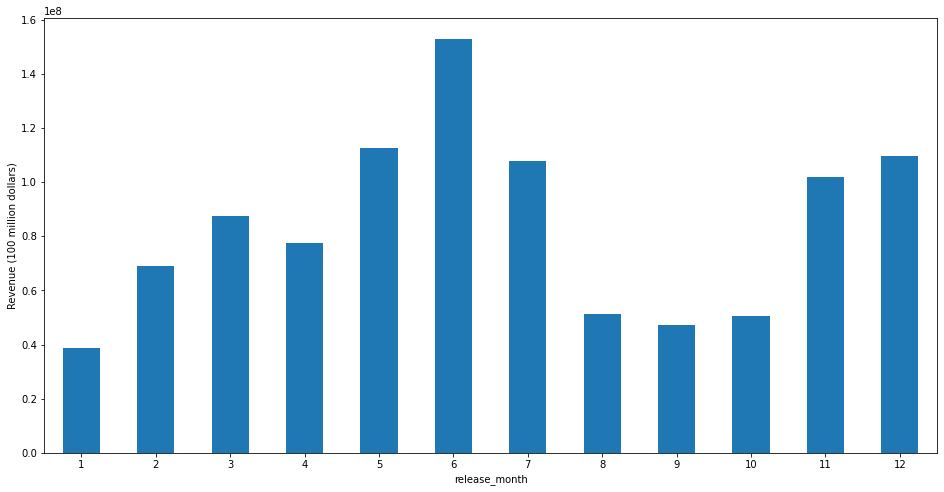

In [106]:
print('\n\n\n-----------the revenues in each months-----------\n')
from matplotlib import pyplot as plt
%matplotlib inline

figure = plt.figure(figsize=(16, 8))
train.groupby('release_month').agg('mean')['revenue'].plot(kind='bar', rot=0)
plt.ylabel('Revenue (100 million dollars)')

Text(0.5, 1.0, 'Years')

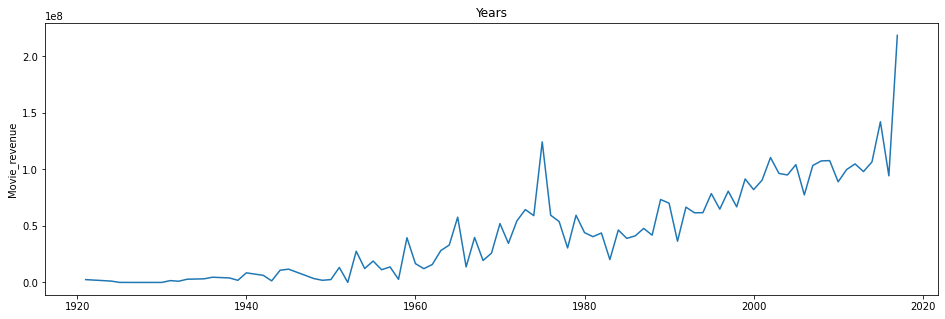

In [112]:
year_mean = train.groupby(['release_year'])['revenue'].mean() # calculate the average avenue for each year
fig_year = plt.figure(figsize=(16, 5))  
plt.plot(year_mean)
plt.ylabel('Movie_revenue') 
plt.title('Years')  

Text(0.5, 1.0, 'runtime')

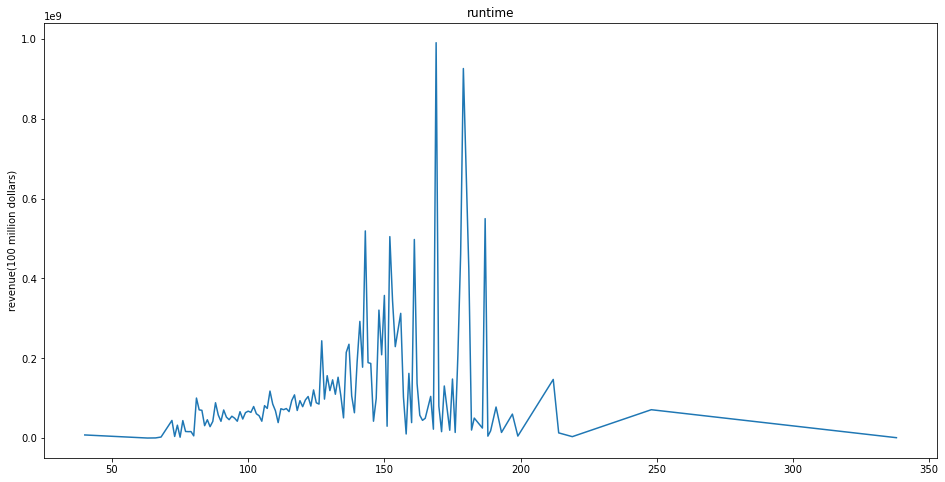

In [123]:
# relationship between runtime and revenue
runtime_mean_revenue = train.groupby(['runtime'])['revenue'].mean()
fig_time = plt.figure(figsize=(16, 8))
plt.plot(runtime_mean_revenue)
plt.ylabel('revenue(100 million dollars)')  
plt.title('runtime')  

Text(0.5, 1.0, 'popularity')

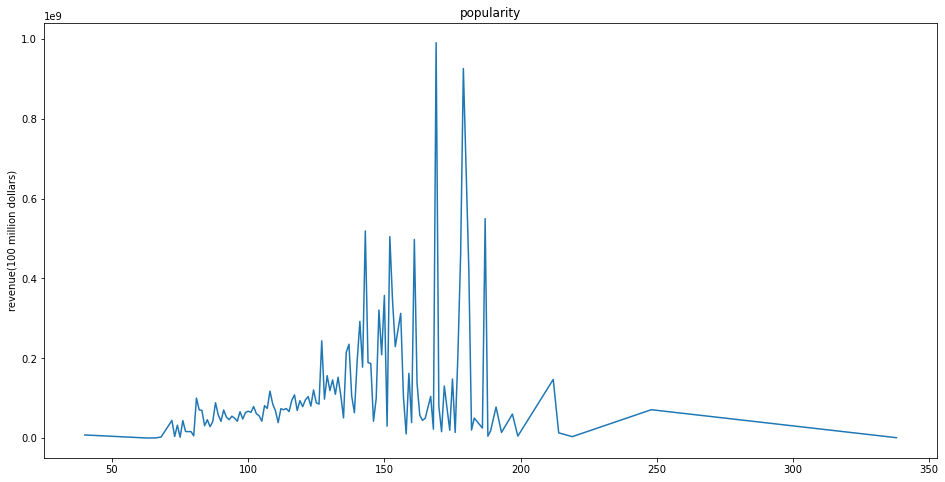

In [121]:
# relationship between popularity and revenue
popularity_mean_revenue = train.groupby(['popularity'])['revenue'].mean()
fig_time = plt.figure(figsize=(16, 8))
plt.plot(runtime_mean_revenue)
plt.ylabel('revenue(100 million dollars)')  
plt.title('popularity')  

<AxesSubplot:xlabel='budget', ylabel='Density'>

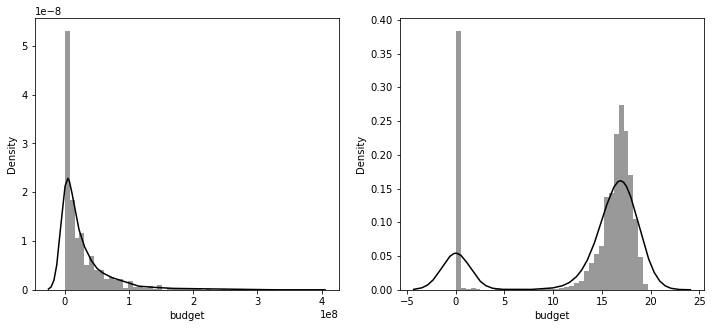

In [124]:
train = train.astype({"budget":'Int32',})
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.distplot(train['budget'],ax=ax[0],color='black')
sns.distplot(np.log1p(train['budget']),ax=ax[1],color='black')

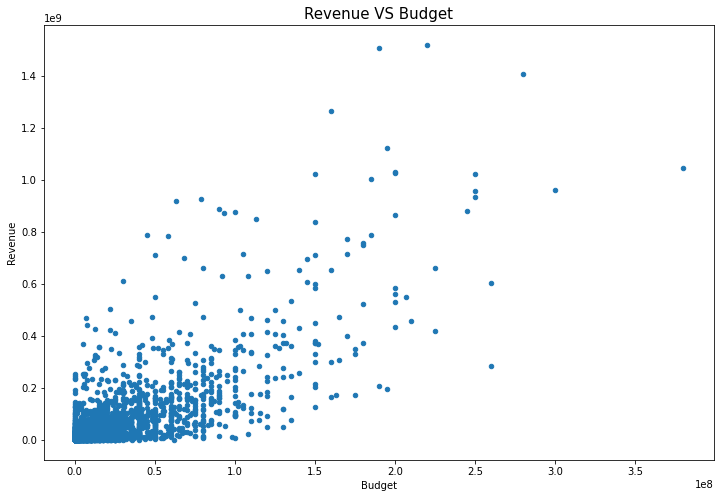

In [129]:
train[['budget','revenue']].plot(kind='scatter',x='budget',y='revenue',figsize=(12,8))
plt.title("Revenue VS Budget",fontsize=15)
plt.xlabel('Budget',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10)
plt.show()

# Prediction data 

In [130]:
train.corr().revenue

id                 0.004478
budget             0.741928
popularity         0.444178
runtime            0.239114
revenue            1.000000
release_year       0.181974
release_month      0.018189
release_day        0.035252
release_quarter   -0.000736
Name: revenue, dtype: float64